In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [14]:

# def perform_erosion(image, structuring_element_size):
#     row, cols = image.shape
#     kernel = np.ones((structuring_element_size, structuring_element_size), np.uint8)
#     eroded_image = np.zeros(image.shape)

#     for i in range(structuring_element_size//2, row-structuring_element_size//2):
#         for j in range(structuring_element_size//2, cols-structuring_element_size//2):
#             region = image[i-structuring_element_size//2:i+structuring_element_size//2+1,
#                      j-structuring_element_size//2:j+structuring_element_size//2+1]
#             eroded_image[i, j] = np.min(region*kernel)

#     return eroded_image

In [15]:
def perform_erosion(image, structuring_element_size):
    row, col = image.shape
    kernel = np.ones((structuring_element_size, structuring_element_size), np.uint8)
    eroded_image = np.zeros(image.shape)
    pad = structuring_element_size // 2
    for i in range(pad, row-pad):
        for j in range(pad, col-pad):
            region = image[i-pad:i+pad+1, j-pad:j+pad+1]
            eroded_image[i][j] = np.min(region*kernel)
    return eroded_image

In [16]:
def perform_dilation(image, structuring_element_size):
    row, cols = image.shape
    kernel = np.ones((structuring_element_size, structuring_element_size), np.uint8)
    eroded_image = np.zeros(image.shape)

    for i in range(structuring_element_size//2, row-structuring_element_size//2):
        for j in range(structuring_element_size//2, cols-structuring_element_size//2):
            region = image[i-structuring_element_size//2:i+structuring_element_size//2+1,
                     j-structuring_element_size//2:j+structuring_element_size//2+1]
            eroded_image[i, j] = np.max(region*kernel)

    return eroded_image

In [17]:
original_image = cv2.imread('wirebond.tif', cv2.IMREAD_GRAYSCALE)
structuring_element_size = 15
eroded_image = perform_erosion(original_image, structuring_element_size)
dilated_image = perform_dilation(original_image, structuring_element_size)

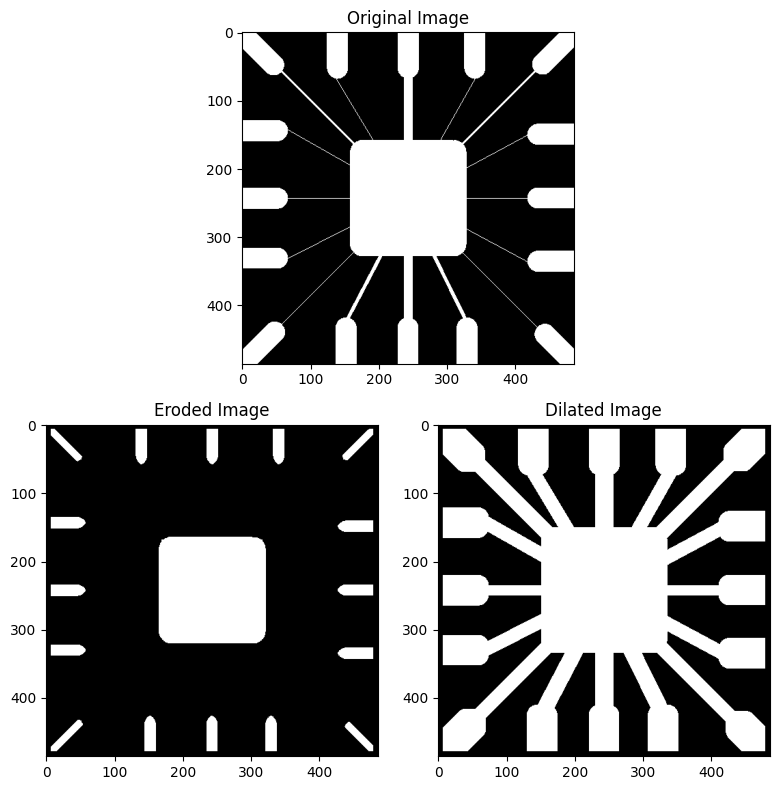

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, (1, 2))
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.subplot(2, 2, 4)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.tight_layout()
plt.show()
